## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 22.01.2022

Дедлайн: 23:59MSK 07.02.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://official.contest.yandex.ru/contest/34705/enter нужно отправить файл hw5code.py с реализованными функциями и классами.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
circles = datasets[0]
moons = datasets[1]
classific = datasets[2]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

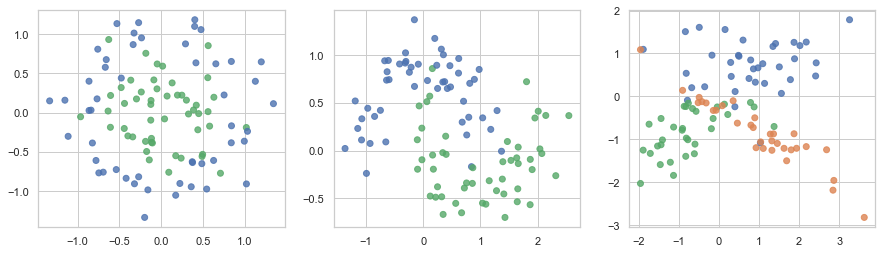

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def tree_learner(dataset, datasetName, params=None,):
    X, y = dataset[0], dataset[1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
    
    if params == None:
        clf = DecisionTreeClassifier(random_state=13)
        strin2 = ''
    else:
        clf = DecisionTreeClassifier(
                                        max_depth=params['max_depth'],
                                        min_samples_leaf=params['min_samples_leaf'],
                                        random_state=13)
        strin2 = f"\n max_depth: {params['max_depth']}\n min_samples_leaf:{params['min_samples_leaf']}"
    
    clf.fit(X_train, y_train)
    acur_test = clf.score(X_test, y_test) * 100
    acur_train = clf.score(X_train, y_train) * 100
    string = f'{datasetName}\n accuracy on test: {round(acur_test, 2)},\n accuracy on train: {round(acur_train, 2)}' + strin2
    plot_surface(clf, X, y, string)

In [7]:
def plot_surface(clf, X, y, string):
    #plt.figure(figsize=(8, 6))
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    plt.title(string)

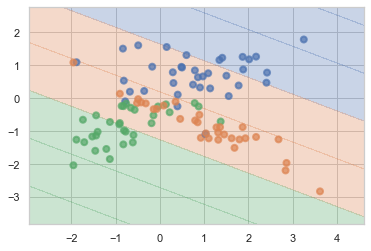

In [9]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y, '')

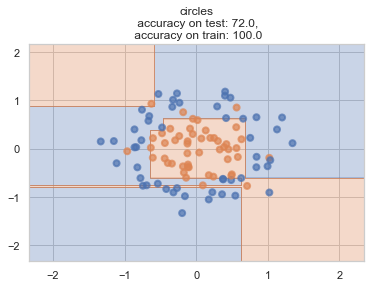

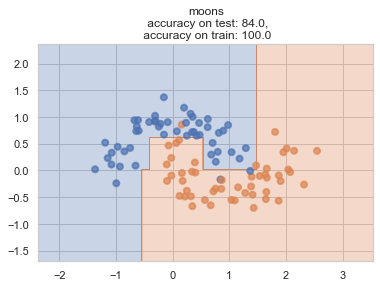

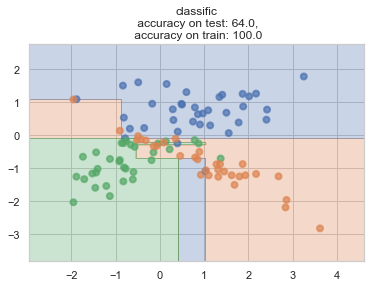

In [10]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
tree_learner(circles, 'circles')
plt.figure()
tree_learner(moons, 'moons')
plt.figure()
tree_learner(classific, 'classific')

__Ответ:__ на тренировочй выборке видно переобучение. Такая модель будет работать плохо.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec
import itertools
def task_2(dataset, datasetName):
    params = {
            'max_depth': [1, 2, 3, 4, 5],
            'min_samples_leaf': range(1, 4)
             }
    #fig, ax = plt.subplot(nrows=4, ncols=5, figsize=(15, 12))
    gs = gridspec.GridSpec(4, 4)
    fig = plt.figure(figsize=(15, 12))
    for i, grd in zip(itertools.product(params['max_depth'], params['min_samples_leaf']), itertools.product([0, 1, 2, 3], repeat=2)):
        plt.subplot(gs[grd[0], grd[1]])
        tree_learner(dataset, datasetName, {'max_depth': i[0], 'min_samples_leaf':i[1]})


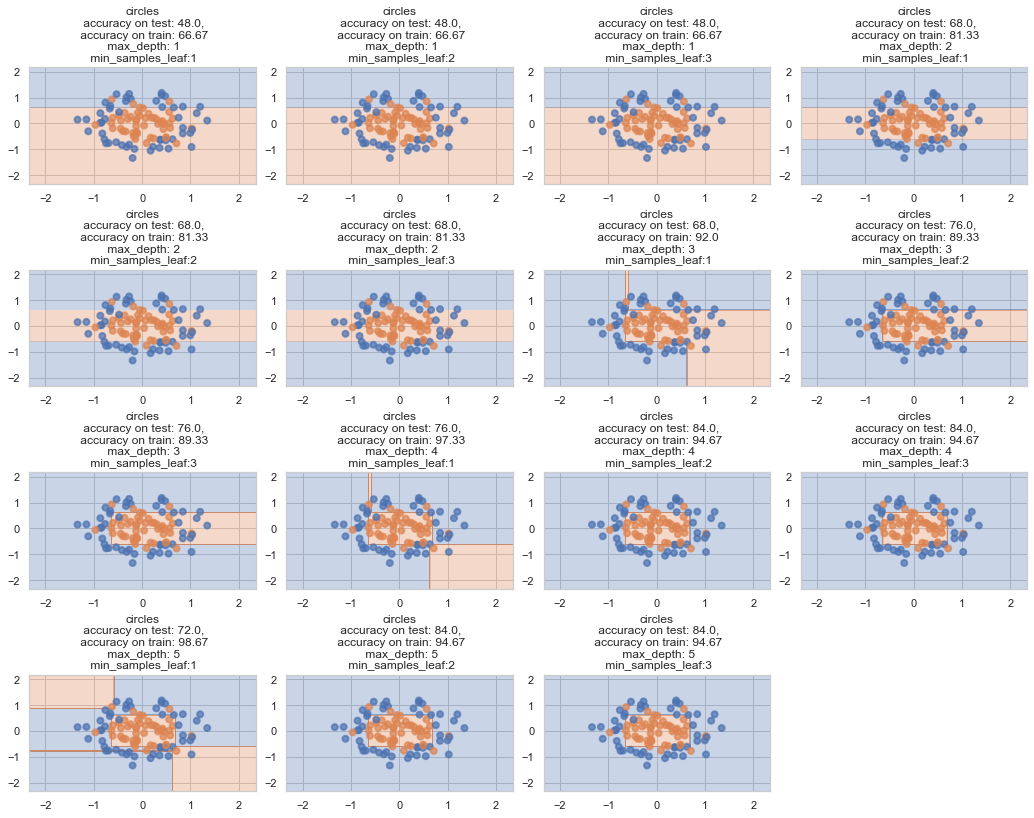

In [12]:
task_2(circles, 'circles')

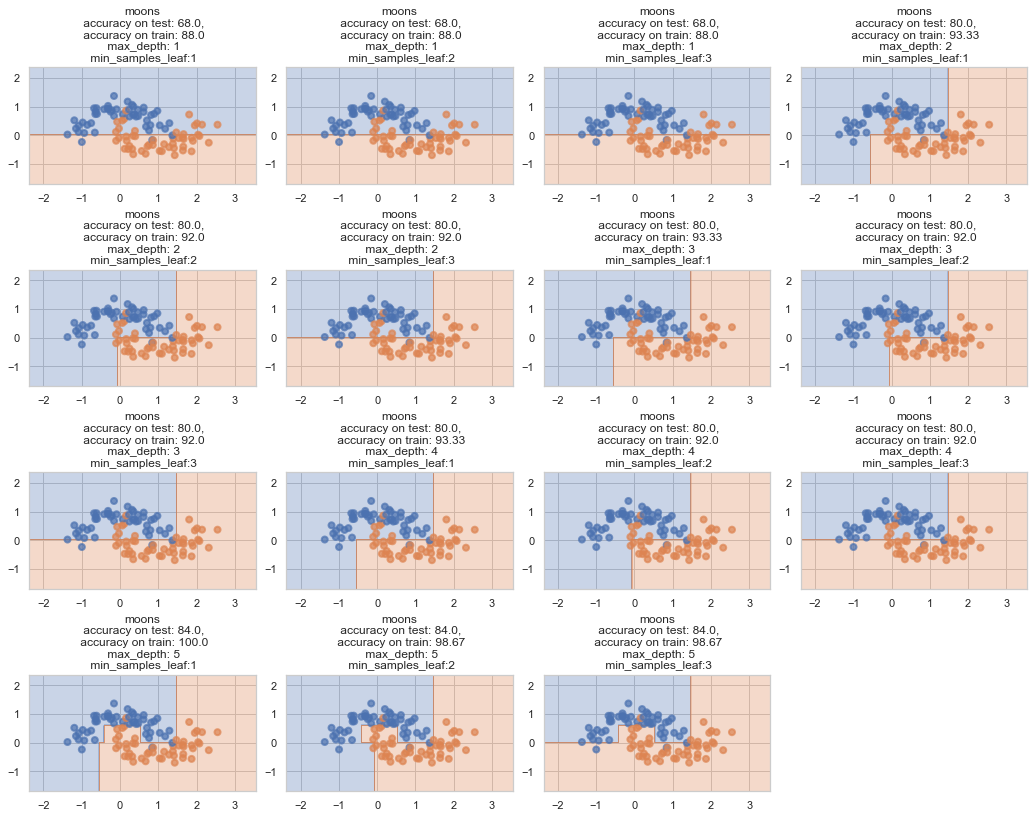

In [13]:
task_2(moons, 'moons')

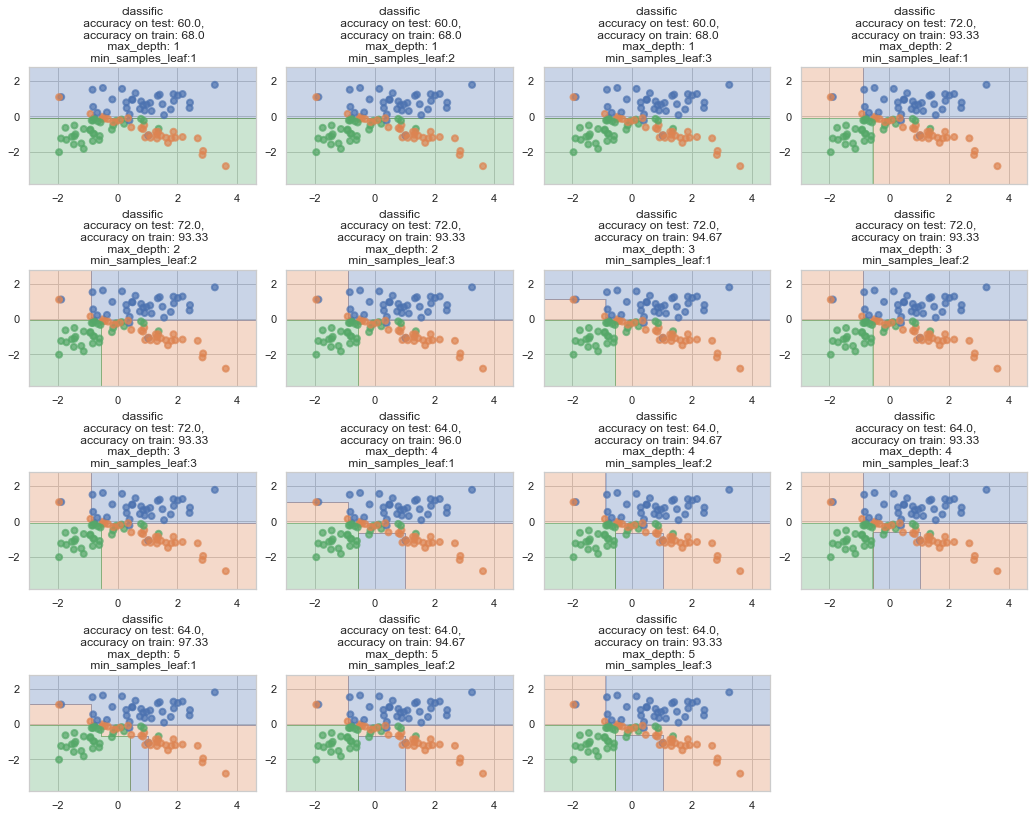

In [14]:
task_2(classific, 'classific')

Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

__Ответ:__ с у величением глубины дерево имеет больше шансов переобучиться. Минимальное кол-во объектов в листе сдерживает этот негативный эффект, так-как не даёт построить дерево в котором будет 1 объект(явный признак переобучения)

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$
$R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
    $$H(R) = 1-p_1^2-p_0^2$$ 
$p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

Указания:
* Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
* В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
* Поведение функции в случае константного признака может быть любым.
* При одинаковых приростах Джини нужно выбирать минимальный сплит.
* За наличие в функции циклов балл будет снижен. Векторизуйте! :)

:param feature_vector: вещественнозначный вектор значений признака.
:param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

:return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
разделить на две различные подвыборки, или поддерева
:return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
:return threshold_best: оптимальный порог (число)
:return gini_best: оптимальное значение критерия Джини (число)


__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import numpy as np
from collections import Counter

def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    # доля объектов  класса 1
    arg = np.argsort(feature_vector)
    feature_vector = feature_vector[arg]
    target_vector = target_vector[arg]
    thresholds = (feature_vector + np.roll(feature_vector, 1))[1:] / 2

#     target_vector = target_vector[np.argsort(feature_vector)]
#     feature_vector = np.sort(feature_vector)
 
 
    #thresholds = 0.5*(feature_vector[1:] + feature_vector[:-1])
   
    p0_l_val = np.array([np.sum(target_vector[:i] == 0)/len(target_vector[:i]) for i in range(1, len(target_vector))])
    p1_l_val = np.array([np.sum(target_vector[:i] == 1)/len(target_vector[:i]) for i in range(1, len(target_vector))])
    p0_r_val = np.array([np.sum(target_vector[i:] == 0)/len(target_vector[i:]) for i in range(1, len(target_vector))])
    p1_r_val = np.array([np.sum(target_vector[i:] == 1)/len(target_vector[i:]) for i in range(1, len(target_vector))])

    R_l = np.arange(1, len(target_vector))
    R_r = np.arange(len(target_vector) - 1, 0, -1)
    
    H_l = 1 - p0_l_val**2 - p1_l_val**2
    H_r = 1 - p0_r_val**2 - p1_r_val**2
    
    ginis = - R_l / len(target_vector) * H_l - R_r / len(target_vector) * H_r
    
    threshold_best = thresholds[np.argmax(ginis)]
    gini_best = np.max(ginis)

    return thresholds, ginis, threshold_best, gini_best


__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/AnastasiyaMax/MLDS_ml_course_fall21/blob/main/hw/hw5_trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

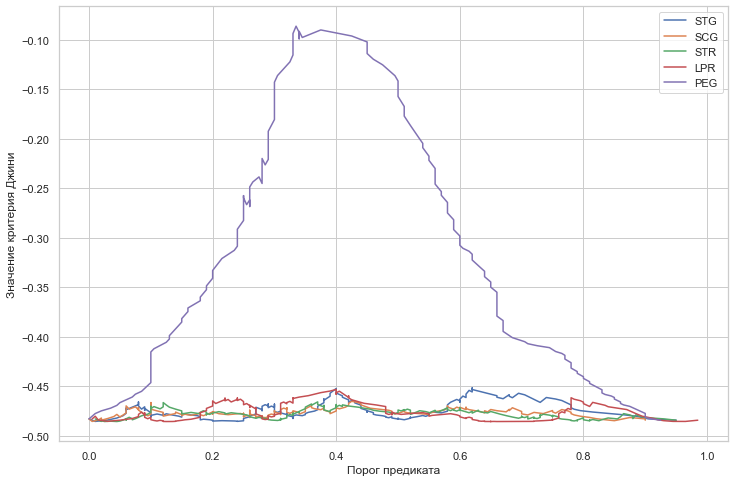

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv("students.csv")
taraget = df['UNS']
features = df.drop(['UNS'], axis=1)
plt.figure(figsize=(12,8))
for i in features.columns:
    thresholds, ginis, threshold_best, gini_best = find_best_split(features[i], taraget)
    plt.plot(thresholds, ginis, label=i)
plt.legend(features.columns);
plt.xlabel('Порог предиката');
plt.ylabel('Значение критерия Джини');

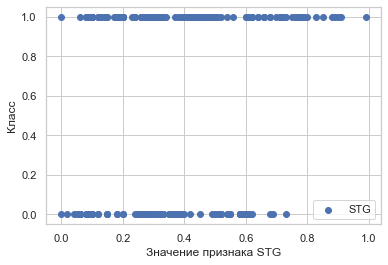

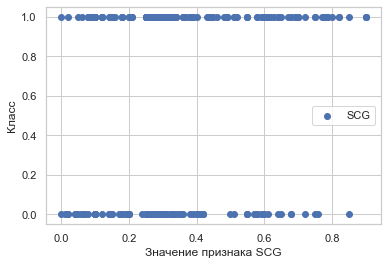

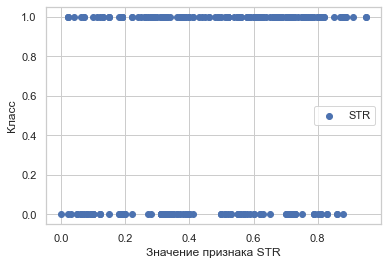

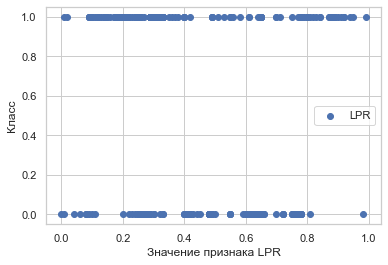

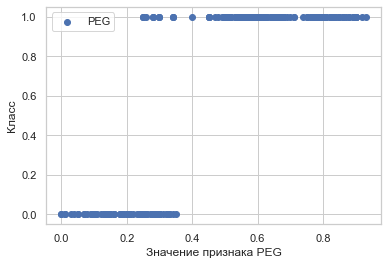

In [17]:
for i in list(features.columns):
    fig, ax = plt.subplots()
    ax.scatter(features[i], taraget, label=i)
    ax.legend()
    plt.ylabel('Класс')
    plt.xlabel(f'Значение признака {i}')

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Нужно использовать признак PEG. На точечном графике для PEG видно, что после определённого порога происходит явное разделение объектов на классы по признаку. РАспределение хороших признаков похоже на нормальное, а функция распределения на сигмоиду.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [18]:
class DecisionTree:
    """
    Как же круто, что для этого "прекрасного" класса НЕНАПИСАЛИ комментарий даже для входных данных
    :param feature_types  - список показывает что за категория

    """
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        # Встроенная в Python функция map() используется для применения функции к каждому элементу итерируемого объекта
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")   # Возбуждает указанное исключение.

        self._tree = {}                                 # стартовый node
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self._start = 0
    def _fit_node(self, sub_X, sub_y, node): # принимает x, y, node
        #print(f'{self._start}')
        self._start += 1
        #print(sub_y)
        if np.all(sub_y == sub_y[0]):
        #if sub_y==[]:
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            #node["class"] = sub_y
            return


        # странная строчка
        feature_best, threshold_best, gini_best, split = None, None, None, None

        # циклически проходит по признакам и находит самый ценный признак
        for feature in range(0, sub_X.shape[1]):
            feature_type = self._feature_types[feature] # выбираем по порядку тип  признака из списка признаков
            categories_map = {}                         # создаём пустой словарь
            #print('цикл')
            if feature_type == "real":                  # получаем вектор значений текущего признака feature из матрицы
                feature_vector = sub_X[:, feature]      # объект-признаки
            elif feature_type == "categorical":         # ???какая-то херабора с категориальным признаком???
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0
                    ratio[key] = current_click / current_count 
                sorted_categories = list(map(lambda x: x[0], sorted(ratio.items(), key=lambda x: x[1])))
                categories_map = dict(zip(sorted_categories, list(range(len(sorted_categories)))))

                #feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))
                feature_vector = np.fromiter(map(lambda x: categories_map[x], sub_X[:, feature]), dtype=float)
            else:
                raise ValueError                        # Возбуждает указанное исключение.

            if len(np.unique(feature_vector)) < 2:                # проверка длины ветора признака
                continue


            # thresholds, ginis, threshold_best, gini_best = find_best_split(features[i], taraget)
            # берём текущий вектор признаков и целевой вектор и делаем поиск лучшего предиката
            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature                  # определяем лучший ппризнак
                gini_best = gini                        # оппределяем лучший gini
                split = feature_vector < threshold     # ???какая-то фигня с разделением??? возвращает true or false
                #print(feature_vector)
                
                if feature_type == "real":          # если признак число - лучший порог это лучший порог!!!
                    threshold_best = threshold
                elif feature_type == "categorical": # если признак !число - начинается магия
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))
                else:
                    raise ValueError                    # Возбуждает указанное исключение.
        # конец цикла for
        """
        По выходу из цикла у нас есть лучший по мнению фукнции признак и лучший порог для него.
        Всё это хранится в:
            feature_best;
            gini_best;
            threshold_best;
        
        """

        if feature_best is None:                        # обработка случая feature_best
            node["type"] = "terminal"                   # указывает, что это кончный предикат
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"                    # указывает, что предикат не конечный

        node["feature_split"] = feature_best            #  запоминаем лучший разделяющий признак в ноде
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best          # запоминаем лучший порог для признака
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best   # оппять магия для категориального мусора
        else:
            raise ValueError
        
        node["left_child"], node["right_child"] = {}, {}    # пустые словари возможно тут ошибка
        
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])  # рукурсивный вход в левое крыло
        
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"]) # рукурсивный вход в правое крыло


    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node['type'] == 'terminal':
            return node['class']

        if self._feature_types[node['feature_split']] == 'real':
            if x[node['feature_split']] < node["threshold"]:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])
        else:
            if x[node['feature_split']] in node["categories_split"]:
                return self._predict_node(x, node['left_child'])
            else:
                return self._predict_node(x, node['right_child'])

    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy()
        #print(X.shape)
        #print(y.shape)
        
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        X = X.to_numpy()
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)
    
    def accuracy(self, y_test, predicted):
        result = np.sum([y_test[i] == predicted[i] for i in range(y_test.size)]) / y_test.size
        return result

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfnames = ['taraget','cap-shape','cap-surface', 'cap-color', 'bruises', 
           'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 
           'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=dfnames)
y = df['taraget'].apply(lambda x: 1 if x == 'p' else 0)
X = df.drop(['taraget'], axis=1)
cols = X.columns
X[cols] = X[cols].apply(le.fit_transform)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

feature_type = [] # categorical real
[feature_type.append('categorical') for i in range(0, 22)];

In [21]:
my_tree = DecisionTree(feature_type)
my_tree.fit(X_train, y_train)

In [23]:
print('Точность предсказания на тестовой выборке 0,5:',my_tree.accuracy(y_test.to_numpy(), my_tree.predict(X_test)))

Точность предсказания на тестовой выборке 0,5: 0.9992614475627769


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. 
* Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [88]:
col = ['DataName''DecisionTree, real', 'DecisionTree, сat',
        'DecisionTree, real + ohe', 'DecisionTreeClassifier']

result_df = pd.DataFrame(columns=col)

In [89]:
# Подготовка данных
# грибы
mushrooms_df_name = ['taraget','cap-shape','cap-surface', 'cap-color', 'bruises', 
           'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 
           'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 
           'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
mushrooms_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=mushrooms_df_name)
mushrooms_df['taraget'] = mushrooms_df['taraget'].apply(lambda x: 1 if x == 'p' else 0)

#tictac
tictac_df_names = [ 'top-left-square', 'top-middle-square', 'top-right-square',
                    'middle-left-square', 'middle-middle-square', 'middle-right-square',
                    'bottom-left-square', 'bottom-middle-square', 'bottom-right-square',
                    'taraget']
tictac_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", names=tictac_df_names)
tictac_df['taraget'] = tictac_df['taraget'].apply(lambda x: 1 if x == 'positive' else 0)

#cars
cars_df_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'taraget']
cars_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", names=cars_df_names)
cars_df['taraget'] = cars_df['taraget'].apply(lambda x: 1 if x == 'good' or x == 'vgood' else 0 )

# nursary
nursary_df_names = ['parents','has_nurs', 'form','children','housing', 'finance', 'social', 'health','taraget']
nursary_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', names=nursary_df_names)
nursary_df['taraget'] = nursary_df['taraget'].apply(lambda x: 0 if x=='not_recom' or x=='recommend' else 1)

# лист с датафреймами
df_list = [mushrooms_df, tictac_df, cars_df, nursary_df]

In [106]:
def makeXy(df):
    y = df['taraget']
    X = df.drop(['taraget'], axis=1)
    return X, y

def FeatureTypeMake(cat, length):
    feature_type = [cat] * length
    return feature_type

def LeEncoder(X):
    le = preprocessing.LabelEncoder()
    cols = X.columns
    X[cols] = X[cols].apply(le.fit_transform)
    return X

def DecisionTreePipeLine(feature_type, df):
    X, y = makeXy(df)
    X = LeEncoder(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.75, random_state=13)
    my_tree = DecisionTree(feature_type)
    my_tree.fit(X_train, y_train)
    accuracy = my_tree.accuracy(y_test.to_numpy(), my_tree.predict(X_test))
    return accuracy

In [102]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
temp_list = []
df_list_names = ['mushrooms', 'tic-tac', 'cars', 'nursary']
for df, df_names in zip(df_list, df_list_names):
    
    if(df_names == 'tic-tac' or df_names == 'cars'):
        continue
    
    print(df_names)
    feature_type = FeatureTypeMake('categorical', df.columns.size)
    accuracy = DecisionTreePipeLine(feature_type, df)
    temp_list.append([df_names, accuracy])
   

mushrooms
nursary


In [104]:
temp_list

[['mushrooms', 0.9993435089446906], ['nursary', 0.9997942386831276]]

In [110]:
temp_list = []
df_list_names = ['mushrooms', 'tic-tac', 'cars', 'nursary']
for df, df_names in zip(df_list, df_list_names):
    
    if(df_names == 'mushrooms' or df_names == 'tic-tac' or df_names == 'cars'):
        continue
    
    print(df_names)
    feature_type = FeatureTypeMake('real', df.columns.size)
    accuracy = DecisionTreePipeLine(feature_type, df)
    temp_list.append([df_names, accuracy])

nursary


In [111]:
temp_list

[['nursary', 0.9997942386831276]]

__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

* К сожалению в задании 9 так и не получилось засатвить работать код класса со всеми выборками. Потратил на отладку очень много времени но так и не рабозрался в чём проблема. =(